In [2]:
import numpy as np
import matplotlib.pyplot as plt

train = np.load("../data/train_ensemble.npy")
test  = np.load("../data/test_history.npy")

train.shape, test.shape


((4000, 1000, 11), (500, 100, 11))

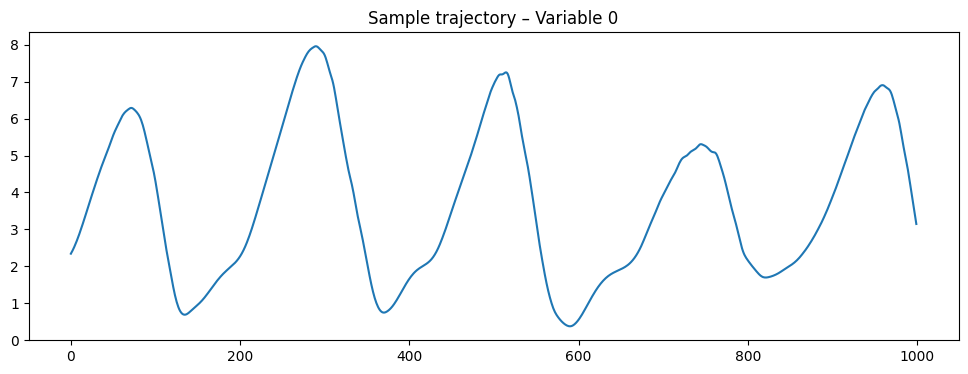

In [4]:
plt.figure(figsize=(12,4))
plt.plot(train[0, :, 0])
plt.title("Sample trajectory – Variable 0")
plt.show()


In [5]:
mean = train.mean(axis=(0,1))
std  = train.std(axis=(0,1))

mean, std


(array([3.27003714, 3.26327888, 3.26093939, 3.25840855, 3.26555192,
        3.26773192, 3.26771989, 3.26226154, 3.25711287, 3.26723739,
        3.26825187]),
 array([2.01777047, 2.0145283 , 2.0130921 , 2.01186522, 2.01400443,
        2.01281232, 2.01495731, 2.01346793, 2.01036249, 2.01406625,
        2.01470731]))

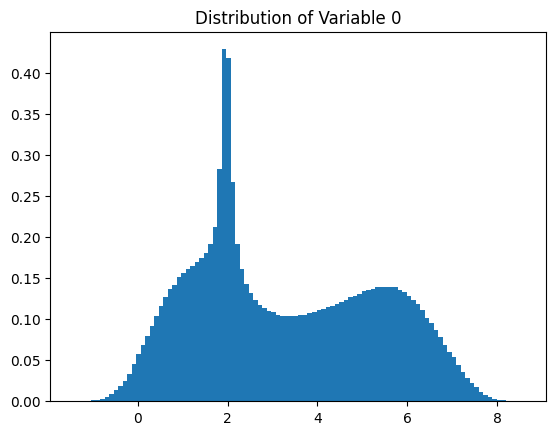

In [6]:
plt.hist(train[...,0].flatten(), bins=100, density=True)
plt.title("Distribution of Variable 0")
plt.show()


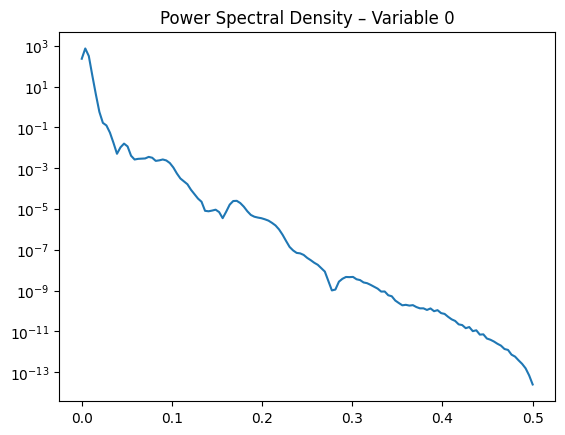

In [7]:
from scipy.signal import welch

freqs, psd = welch(train[0,:,0], nperseg=256)

plt.semilogy(freqs, psd)
plt.title("Power Spectral Density – Variable 0")
plt.show()


In [8]:
np.save("../configs/mean.npy", mean)
np.save("../configs/std.npy", std)


In [9]:
train_norm = (train - mean) / std

print(train_norm.mean(axis=(0,1)))
print(train_norm.std(axis=(0,1)))


[-1.36740696e-13  1.63397232e-13  2.95289997e-14 -9.06464636e-15
  7.21966154e-16  5.45956289e-15  1.13468665e-13 -4.97912402e-14
 -5.04960296e-14 -1.20393021e-14 -9.37464387e-14]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
